In [139]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import biosppy.signals.ecg as ecg
import neurokit2 as nk
import pandas as pd

In [146]:
def clean_ecg(ecg_data, sampling_rate):
    # filter ECG data to remove noise
    ecg_cleaned, _, _ = ecg.filter_signal(signal=ecg_data, sampling_rate=sampling_rate, 
                                           ftype='FIR', band='bandpass', order=4,
                                           frequency=[3, 45])
    
    # segment the filtered ECG into beats
    rpeaks, _ = ecg.extract_heartbeats(signal=ecg_cleaned, sampling_rate=sampling_rate,
                                       before=0.2, after=0.4)
    
    # remove ectopic beats and correct missed beats
    rpeaks, _ = ecg.correct_rpeaks(signal=ecg_cleaned, rpeaks=rpeaks, sampling_rate=sampling_rate, 
                                   tol=0.05)
    
    # compute heart rate variability (HRV) features
    hrv = ecg.hrv(rpeaks=rpeaks, sampling_rate=sampling_rate, show=False)
    
    return ecg_cleaned, rpeaks, hrv

def divide_ecg_blocks(ecg_data, block_start, sampling_rate, block_duration):
    ecg_blocks = []
    for start, duration in zip(block_start.flatten(), block_duration):
        block_ecg = ecg_data[int(start * sampling_rate):int((start+duration) * sampling_rate)]
        ecg_blocks.append(block_ecg)
    return ecg_blocks

In [151]:
def get_ecg(data, i):
    block_start = data['bp_data'][0][0][6]
    bpdata = data['bp_data'][0][0][0]
    ecg_data = bpdata[:, 3]
    time = np.arange(0, len(ecg_data))/1000
    block_duration = np.diff(np.concatenate(([0], block_start.flatten())))
    plot_ecg(ecg_data, time, i)
    get_ibi(ecg_data, i)
    return ecg_data

In [148]:
import biosppy.signals.ecg as ecg

def get_ibi(ecg_signal, file_name):
    filtered_ecg = ecg.ecg(signal=ecg_signal, sampling_rate=1000, show=False)['filtered']

    # extract R peaks
    rpeaks = ecg.engzee_segmenter(signal=filtered_ecg, sampling_rate=1000)['rpeaks']

    # calculate IBI
    ibi = np.diff(rpeaks) / 1000.0
    
    # plot IBI
    plt.figure()
    plt.plot(ibi)
    plt.title('Interbeat Interval (IBI)')
    plt.xlabel('Beat Index')
    plt.ylabel('IBI (s)')
    plt.show()
    plt.savefig('IBI_'+str(file_name)+'.jpg')

In [149]:
def plot_ecg(ecg, time, file_name):
    plt.figure()
    fig, ax = plt.subplots()
    ax.plot(time, ecg)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('ECG Amplitude (mV)')
    ax.set_title('ECG Data')
    plt.show()
    plt.savefig('ECG_'+str(file_name)+'.jpg')

<Figure size 432x288 with 0 Axes>

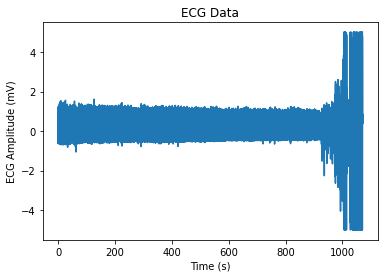

<Figure size 432x288 with 0 Axes>

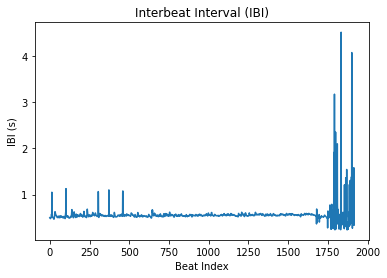

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

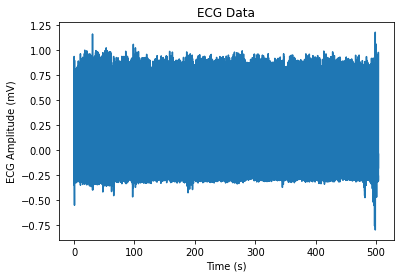

<Figure size 432x288 with 0 Axes>

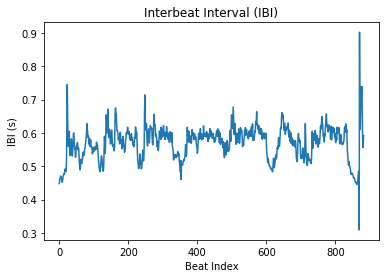

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

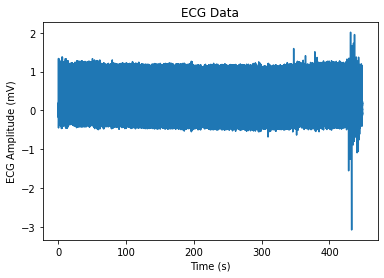

<Figure size 432x288 with 0 Axes>

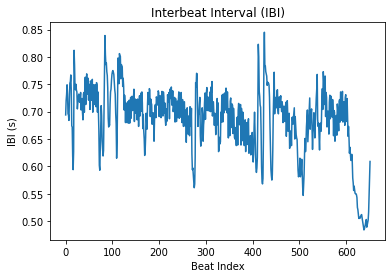

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

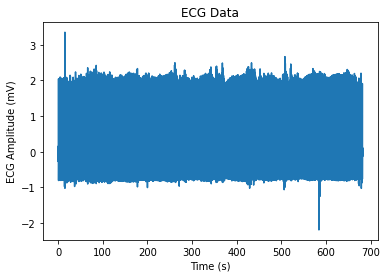

<Figure size 432x288 with 0 Axes>

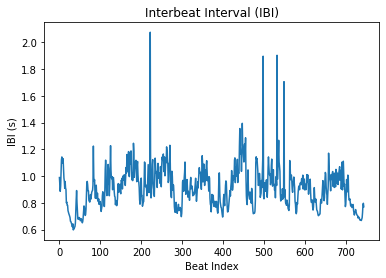

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

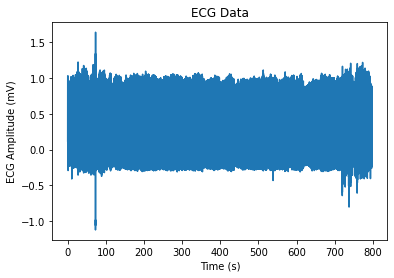

<Figure size 432x288 with 0 Axes>

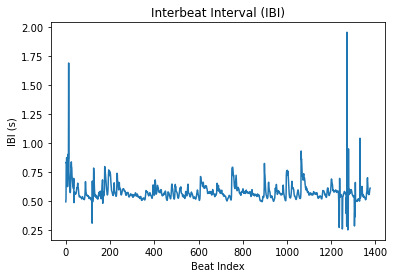

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

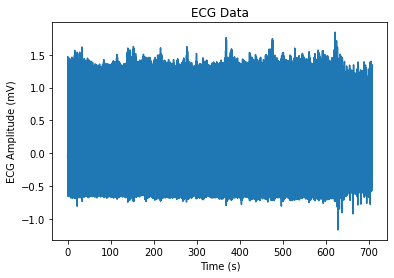

<Figure size 432x288 with 0 Axes>

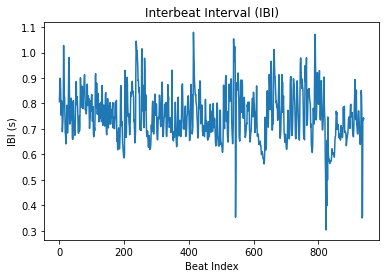

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

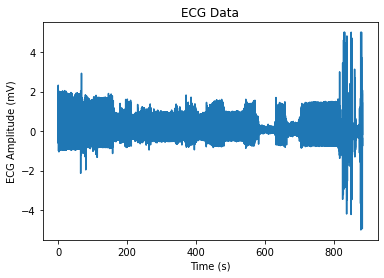

<Figure size 432x288 with 0 Axes>

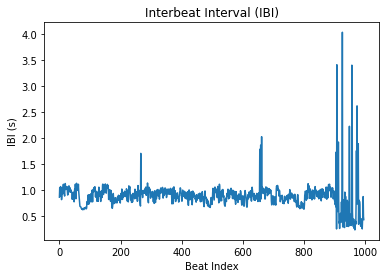

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

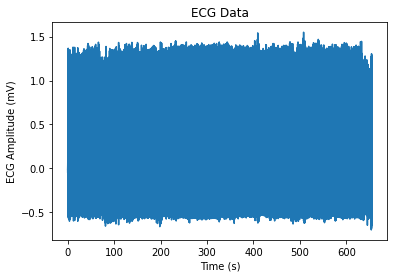

<Figure size 432x288 with 0 Axes>

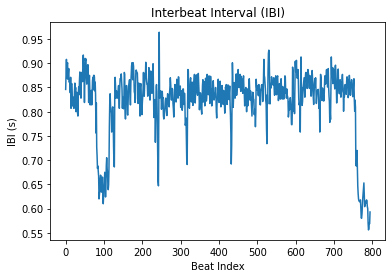

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

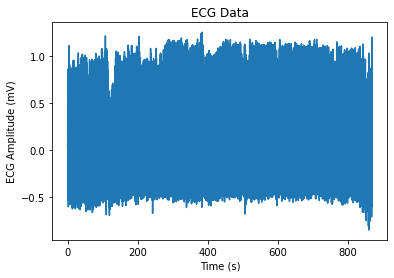

<Figure size 432x288 with 0 Axes>

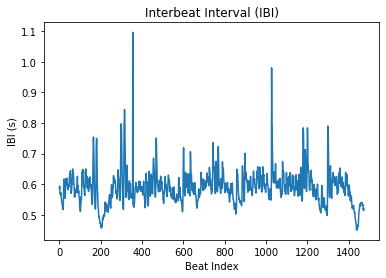

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

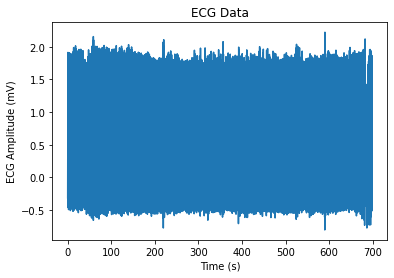

<Figure size 432x288 with 0 Axes>

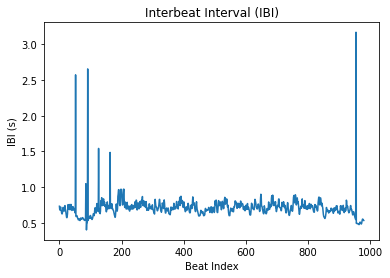

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

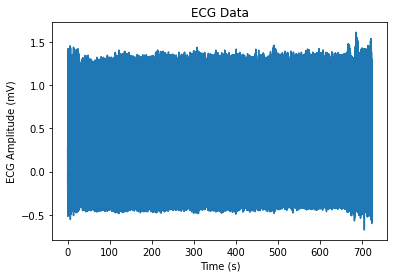

<Figure size 432x288 with 0 Axes>

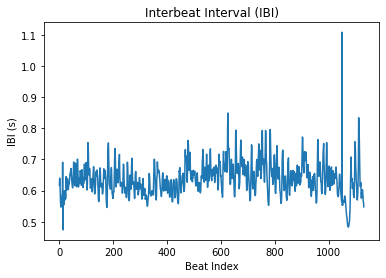

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

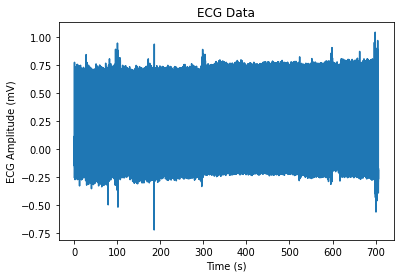

<Figure size 432x288 with 0 Axes>

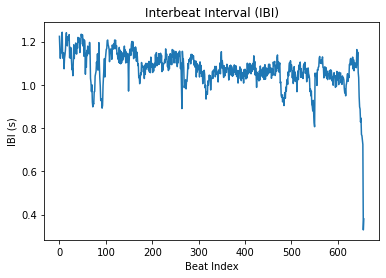

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

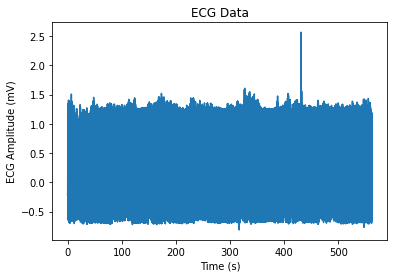

<Figure size 432x288 with 0 Axes>

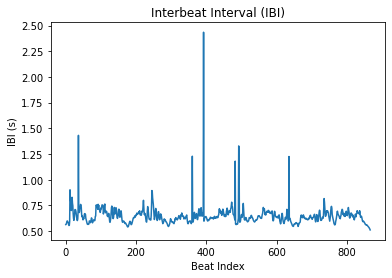

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

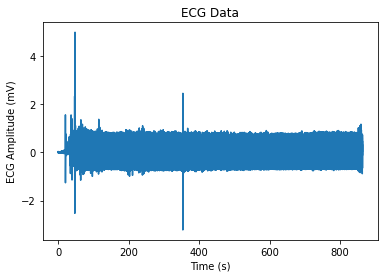

<Figure size 432x288 with 0 Axes>

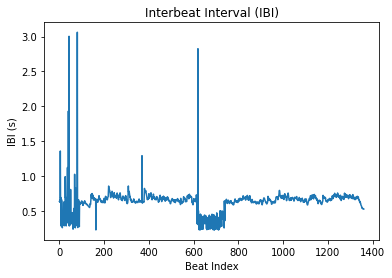

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

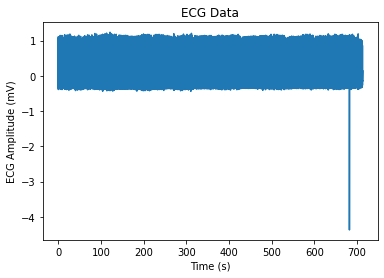

<Figure size 432x288 with 0 Axes>

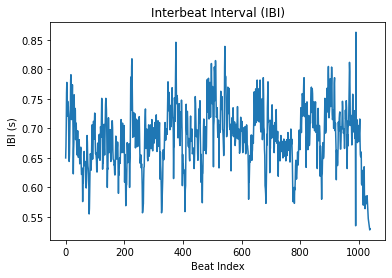

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

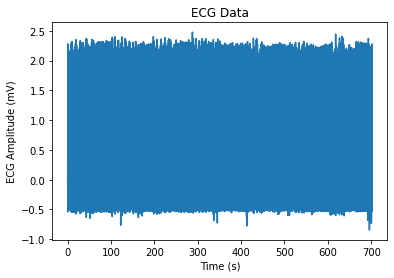

<Figure size 432x288 with 0 Axes>

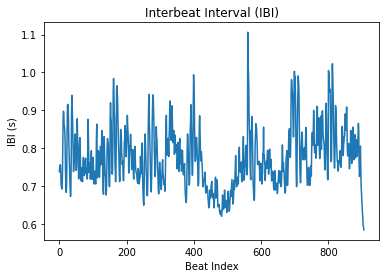

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

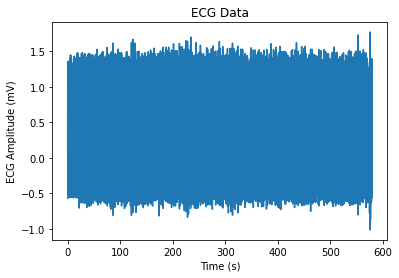

<Figure size 432x288 with 0 Axes>

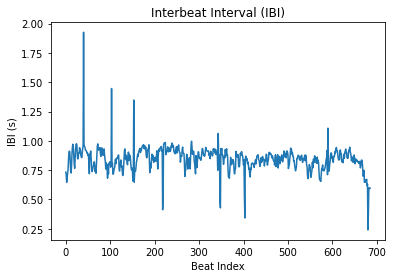

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

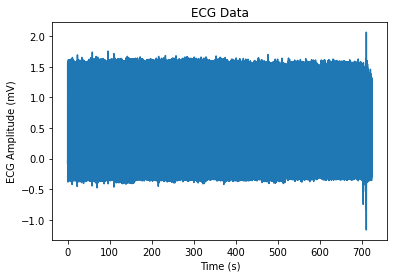

<Figure size 432x288 with 0 Axes>

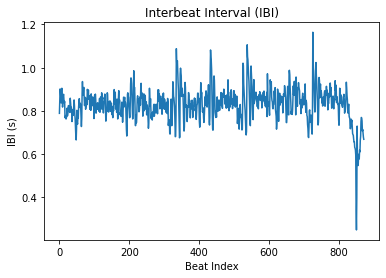

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

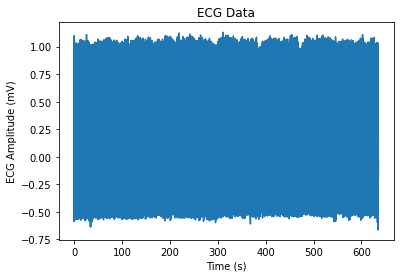

<Figure size 432x288 with 0 Axes>

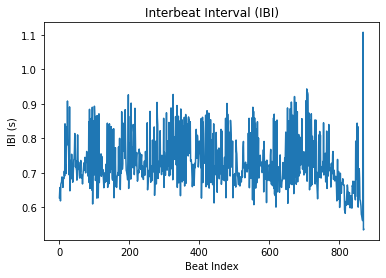

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

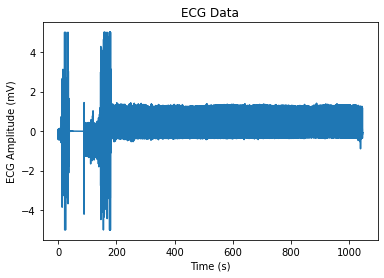

<Figure size 432x288 with 0 Axes>

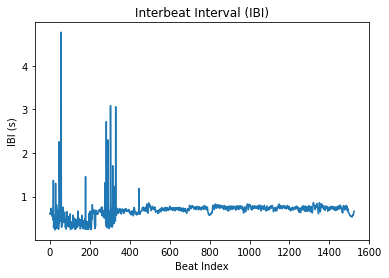

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

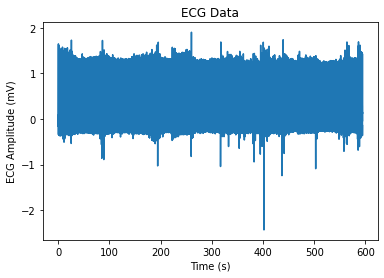

<Figure size 432x288 with 0 Axes>

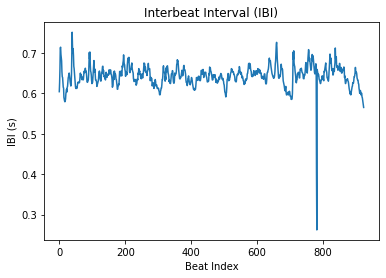

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

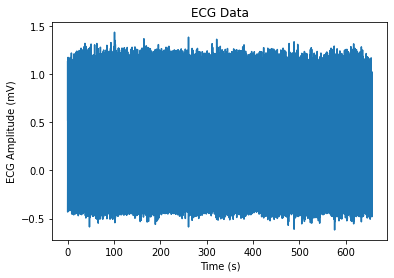

<Figure size 432x288 with 0 Axes>

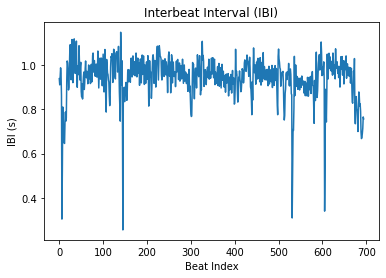

<Figure size 432x288 with 0 Axes>

In [152]:
# Define file path and range of files to process
file_name = 'Physio_Events_'
file_prefix = 'D:/IU/Academics/Semester 2/DATA SCI OF PHYSIO TIME SERIE/Final Project/records/'+file_name
file_range = range(8, 30)

# Process each file in the specified range
for i in file_range:
    file_path = file_prefix + str(i) + '.mat'
    mat_data = scipy.io.loadmat(file_path)
    ecg_data = get_ecg(mat_data, i)
    #print(ecg)
    #plot_ecg(ecg, 'ECG', str(i))

In [79]:
def get_block_start(i, data):
    REJECT = []
    block_start = data['bp_data'][0][0][6]
    block_start_clean = []
    
    if block_start[0] < 0:
        t = 0
        t =+ abs(int(block_start[0]))
        block_start_clean.append(abs(int(block_start[0])))
        for i in np.arange(start =1, stop = len(block_start)):
            if block_start[i] < 0:
                t += (abs(int(block_start[i])))
                block_start_clean.append(t)
            else:
                block_start_clean.append(t + int(block_start[i]))
        if block_start_clean[-1] > len(ecg_data):
            REJECT.append(i)
    else:
        for i in range(len(block_start)):
            block_start_clean.append(abs(int(block_start[i])))
        if block_start_clean[-1] > len(ecg_data):
            REJECT.append(i)
    return block_start_clean 

In [159]:
def clean_ecg(block_start, ecg_data):
    ecg_tasks = [ecg_data[0:block_start[0]-1], ecg_data[block_start[0]:block_start[1]-1], ecg_data[block_start[1]:block_start[2]-1], ecg_data[block_start[2]:block_start[3]-1], ecg_data[block_start[3]:block_start[4]-1], ecg_data[block_start[4]:block_start[5]-1], ecg_data[block_start[5]:block_start[6]-1], ecg_data[block_start[6]:]]
    clean_ecg_tasks = []
    
    for task in ecg_tasks:
        clean_task = nk.ecg_clean(task, sampling_rate = 1000, method = 'neurokit')
        clean_ecg_tasks.append(clean_task)
        #ecg_task_clean_qc = nk.ecg_quality(clean_task, sampling_rate = 1000, method = 'zhao2018', approach = 'fuzzy')
        #print(ecg_task0_clean_qc)
    return clean_ecg_tasks

def get_peaks(clean_ecg_tasks):
    rpeaks = []
    waves = []
    for task in clean_ecg_tasks:
        x, rpeaks_0 = nk.ecg_peaks(task, sampling_rate = 1000, correct_artifacts = True)
        rpeaks.append(rpeaks_0)
        x, waves_peak0 = nk.ecg_delineate(task, sampling_rate = 1000, method ="peak")
        waves.append(waves_peak0)
        #print(waves_peak0)
    print(rpeaks)
    
def clean_ecg_whole(i, ecg_data):
    clean_task = nk.ecg_clean(ecg_data, sampling_rate = 1000, method = 'neurokit')
    ecg_task_clean_qc = nk.ecg_quality(clean_task, sampling_rate = 1000, method = 'zhao2018', approach = 'fuzzy')
    print(f"Subject {str(i)} ECG quality", ecg_task_clean_qc)

Subject 8 ECG quality Excellent
Subject 9 ECG quality Barely acceptable
Subject 10 ECG quality Excellent
10 excepted
Subject 11 ECG quality Excellent
Subject 12 ECG quality Excellent
Subject 13 ECG quality Excellent
Subject 14 ECG quality Excellent
Subject 15 ECG quality Excellent
Subject 16 ECG quality Barely acceptable
Subject 17 ECG quality Excellent
Subject 18 ECG quality Excellent
Subject 19 ECG quality Excellent
Subject 20 ECG quality Excellent
Subject 21 ECG quality Excellent
Subject 22 ECG quality Barely acceptable
Subject 23 ECG quality Excellent
Subject 24 ECG quality Excellent
Subject 25 ECG quality Excellent
Subject 26 ECG quality Excellent
Subject 27 ECG quality Excellent
Subject 28 ECG quality Excellent
Subject 29 ECG quality Excellent


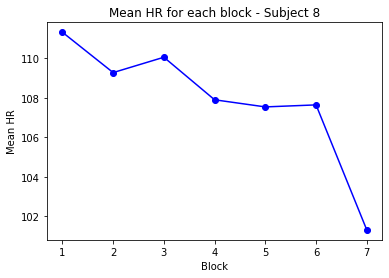

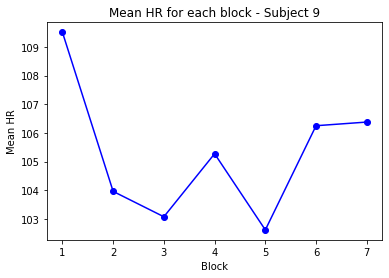

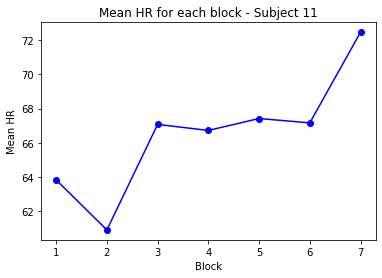

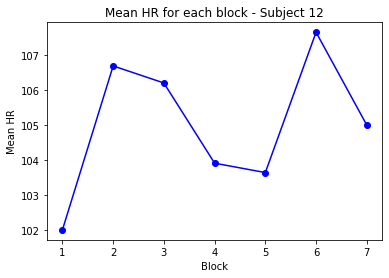

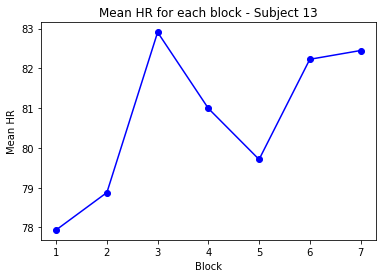

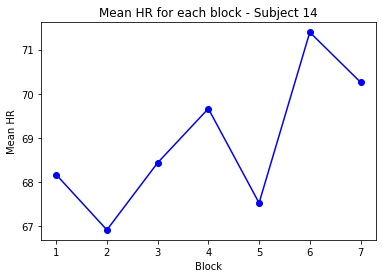

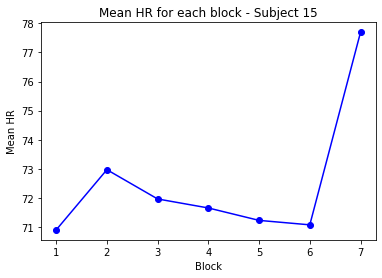

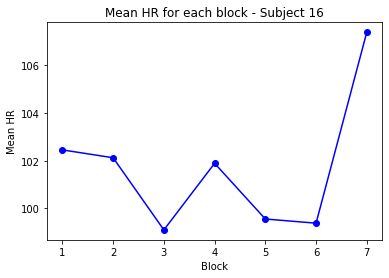

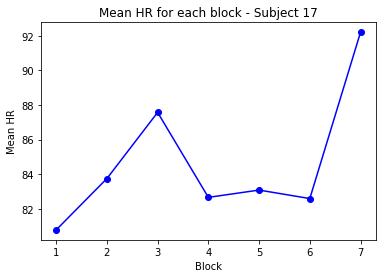

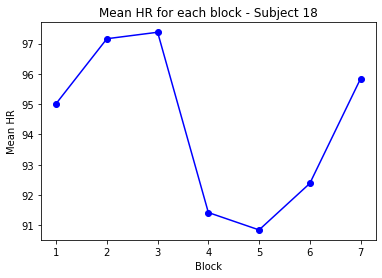

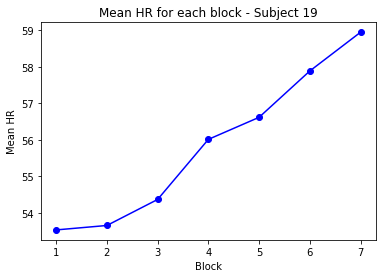

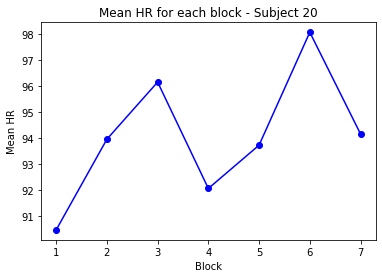

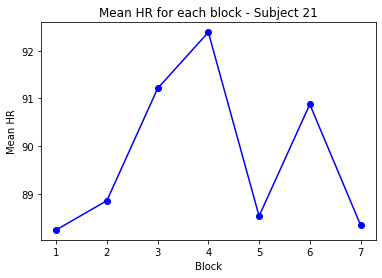

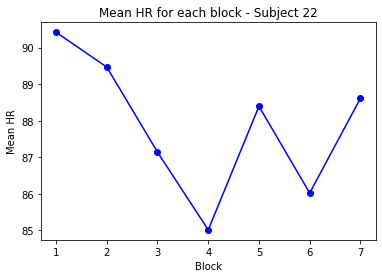

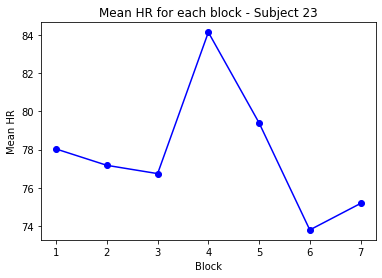

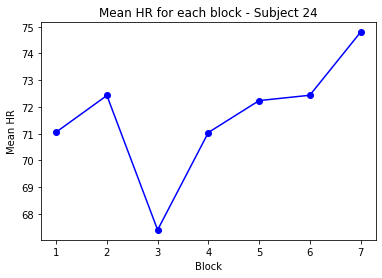

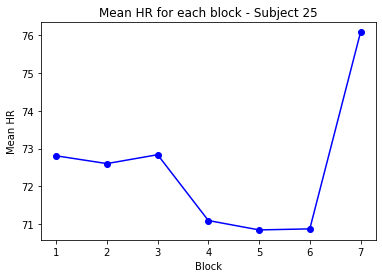

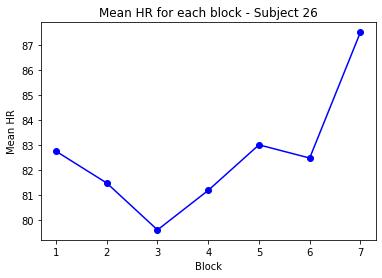

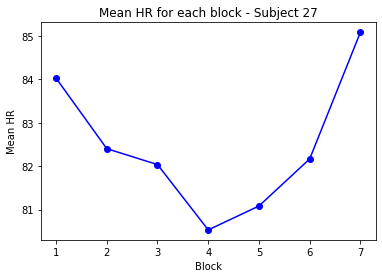

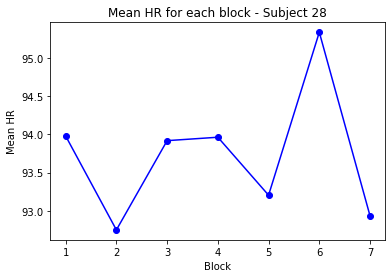

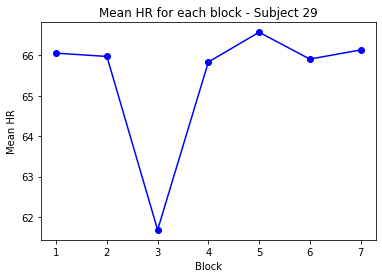

Group 1 Subjects:  [8, 13, 15, 17, 18, 21, 22, 23, 25]
Group 2 Subjects:  [9, 12, 16, 24, 26, 27, 29]


In [160]:
# Define file path and range of files to process
file_name = 'Physio_Events_'
file_prefix = 'D:/IU/Academics/Semester 2/DATA SCI OF PHYSIO TIME SERIE/Final Project/records/'+file_name
file_range = range(8, 30)

subjects_hr_mean = {}
subjects_hp_mean = {}

group1_block2_hr = []
group1_block3_hr = []
group1_block6_hr = []
group2_block2_hr = []
group2_block3_hr = []
group2_block6_hr = []

group1_subjects = []
group2_subjects = []

# Process each file in the specified range
for i in file_range:
    file_path = file_prefix + str(i) + '.mat'
    mat_data = scipy.io.loadmat(file_path)
    block_start = get_block_start(i, mat_data)
    bpdata = mat_data['bp_data'][0][0][0]
    ecg_data = bpdata[:, 3]
    clean_ecg_whole(i, ecg_data)
    hr_block_mean = []
    hp_block_mean = []
    # Clean ECG signal
    try:
        ecg_cleaned_task = clean_ecg(block_start, ecg_data)
        for j in range(1, len(ecg_cleaned_task)):
            # Find R-peaks
            _, rpeaks = nk.ecg_peaks(ecg_cleaned_task[j], sampling_rate=1000)

            # Calculate heart rate
            hr = nk.ecg_rate(rpeaks, sampling_rate=1000)

            # Calculate heart period
            hp = 1 / hr

            #hr_list.append(hr)
            hr_block_mean.append(np.mean(hr))
            hp_block_mean.append(np.mean(hp))
            #hp_list.append(hp)
        if (hr_block_mean[2] > hr_block_mean[5]):
            group1_block2_hr.append(hr_block_mean[1])
            group1_block3_hr.append(hr_block_mean[2])
            group1_block6_hr.append(hr_block_mean[5])
            group1_subjects.append(i)
        elif (hr_block_mean[2] <= hr_block_mean[1]) and (hr_block_mean[5] > hr_block_mean[2]):
            group2_block2_hr.append(hr_block_mean[1])
            group2_block3_hr.append(hr_block_mean[2])
            group2_block6_hr.append(hr_block_mean[5])
            group2_subjects.append(i)
        
        subjects_hr_mean[i] = hr_block_mean
        subjects_hp_mean[i] = hp_block_mean
        
    except:
        print(str(i)+" excepted")
#print(subjects_hr_mean)
#print(subjects_hp_mean)
for subject in subjects_hr_mean.keys():
    plot_hr(subjects_hr_mean[subject], 'HR', subject)
    
print("Group 1 Subjects: ", group1_subjects)
print("Group 2 Subjects: ", group2_subjects)

# Use only the selected blocks for ANOVA
data_group1 = pd.DataFrame({'block2_hr': group1_block2_hr, 'block3_hr': group1_block3_hr, 'block6_hr': group1_block6_hr})
data_group2 = pd.DataFrame({'block2_hr': group2_block2_hr, 'block3_hr': group2_block3_hr, 'block6_hr': group2_block6_hr})

# Add a column to each dataframe to indicate the group of the subject
data_group1['group'] = '1'
data_group2['group'] = '2'

# Combine the dataframes
data = pd.concat([data_group1, data_group2])

# Convert the data in the relevant columns to float
data['block3_hr'] = data['block3_hr'].astype(float)
data['block6_hr'] = data['block6_hr'].astype(float)
data['block2_hr'] = data['block2_hr'].astype(float)

data.to_csv('hr_data.csv')

In [131]:
def plot_hr(block_scl, param, file_name):
    x_values = [1, 2, 3, 4, 5, 6, 7]
    plt.plot(x_values, block_scl, 'bo-')
    plt.xlabel('Block')
    plt.ylabel('Mean '+param)
    plt.title(f'Mean {param} for each block - Subject {file_name}')
    plt.show()

10 excepted


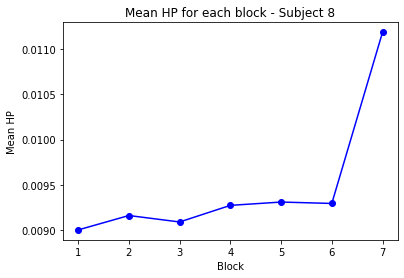

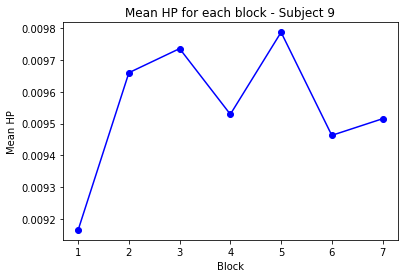

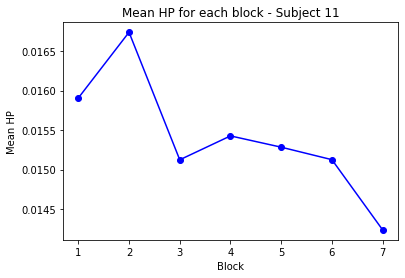

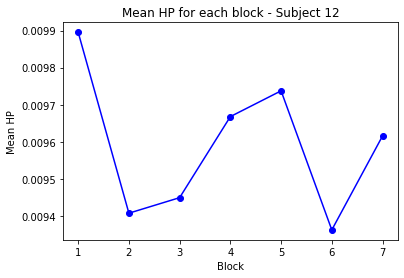

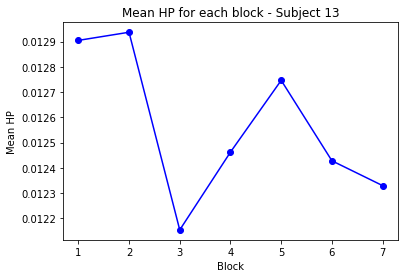

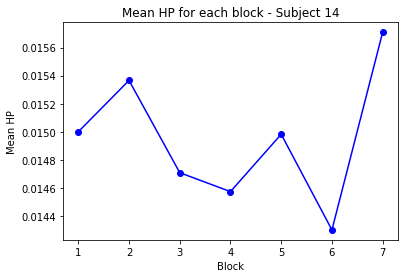

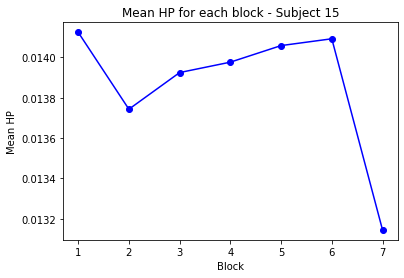

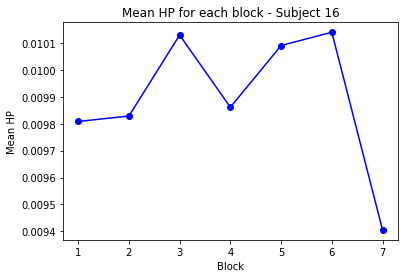

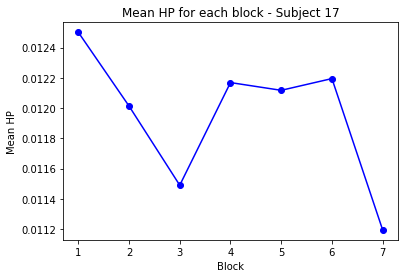

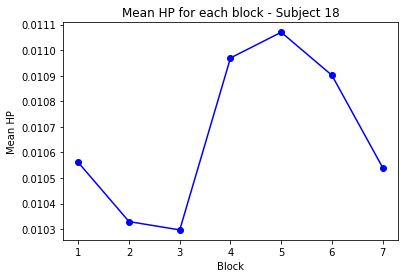

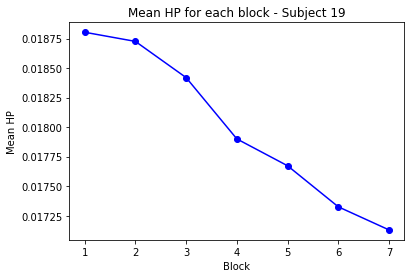

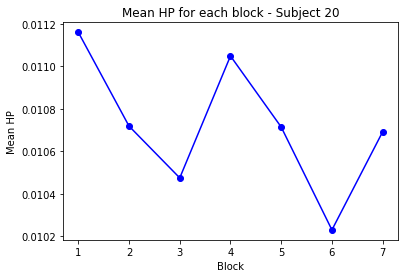

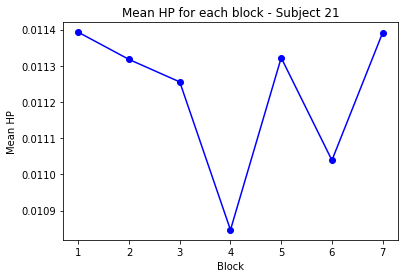

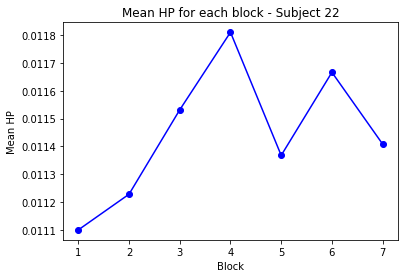

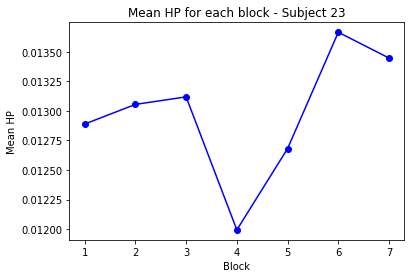

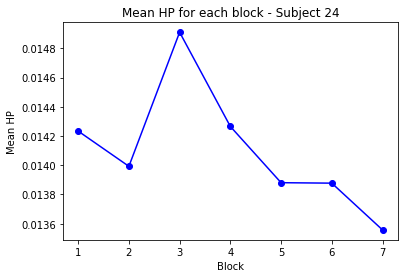

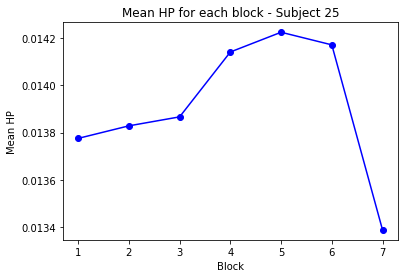

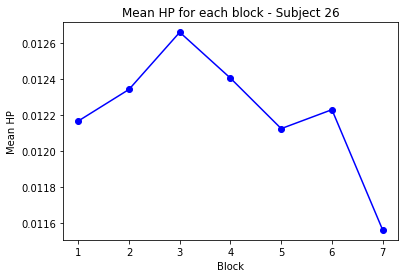

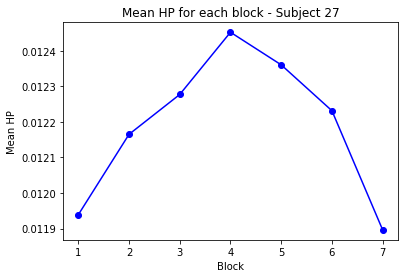

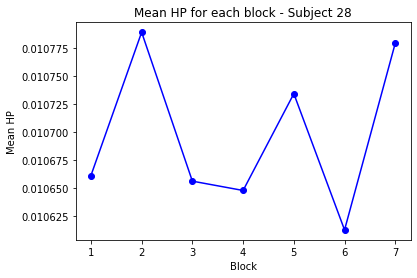

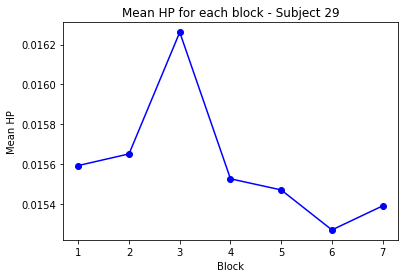

Group 1 Subjects:  [9, 12, 14, 19, 20, 21, 24, 26, 27, 28, 29]
Group 2 Subjects:  [8, 11, 13, 17, 18]


In [142]:
# Define file path and range of files to process
file_name = 'Physio_Events_'
file_prefix = 'D:/IU/Academics/Semester 2/DATA SCI OF PHYSIO TIME SERIE/Final Project/records/'+file_name
file_range = range(8, 30)

subjects_hr_mean = {}
subjects_hp_mean = {}

group1_block2_hp = []
group1_block3_hp = []
group1_block6_hp = []
group2_block2_hp = []
group2_block3_hp = []
group2_block6_hp = []

group1_subjects = []
group2_subjects = []

# Process each file in the specified range
for i in file_range:
    file_path = file_prefix + str(i) + '.mat'
    mat_data = scipy.io.loadmat(file_path)
    block_start = get_block_start(i, mat_data)
    bpdata = mat_data['bp_data'][0][0][0]
    ecg_data = bpdata[:, 3]
    hr_block_mean = []
    hp_block_mean = []
    # Clean ECG signal
    try:
        ecg_cleaned_task = clean_ecg(block_start, ecg_data)
        for j in range(1, len(ecg_cleaned_task)):
            # Find R-peaks
            _, rpeaks = nk.ecg_peaks(ecg_cleaned_task[j], sampling_rate=1000)

            # Calculate heart rate
            hr = nk.ecg_rate(rpeaks, sampling_rate=1000)

            # Calculate heart period
            hp = 1 / hr

            #hr_list.append(hr)
            #hr_block_mean.append(np.mean(hr))
            hp_block_mean.append(np.mean(hp))
            #hp_list.append(hp)
        if (hp_block_mean[2] > hp_block_mean[5]):
            group1_block2_hp.append(hp_block_mean[1])
            group1_block3_hp.append(hp_block_mean[2])
            group1_block6_hp.append(hp_block_mean[5])
            group1_subjects.append(i)
        elif (hp_block_mean[2] <= hp_block_mean[1]) and (hp_block_mean[5] > hp_block_mean[2]):
            group2_block2_hp.append(hp_block_mean[1])
            group2_block3_hp.append(hp_block_mean[2])
            group2_block6_hp.append(hp_block_mean[5])
            group2_subjects.append(i)
        
        #subjects_hr_mean[i] = hr_block_mean
        subjects_hp_mean[i] = hp_block_mean
        
    except:
        print(str(i)+" excepted")
#print(subjects_hr_mean)
#print(subjects_hp_mean)
for subject in subjects_hp_mean.keys():
    plot_hr(subjects_hp_mean[subject], 'HP', subject)
    
print("Group 1 Subjects: ", group1_subjects)
print("Group 2 Subjects: ", group2_subjects)

# Use only the selected blocks for ANOVA
data_group1 = pd.DataFrame({'block2_hp': group1_block2_hp, 'block3_hp': group1_block3_hp, 'block6_hp': group1_block6_hp})
data_group2 = pd.DataFrame({'block2_hp': group2_block2_hp, 'block3_hp': group2_block3_hp, 'block6_hp': group2_block6_hp})

# Add a column to each dataframe to indicate the group of the subject
data_group1['group'] = '1'
data_group2['group'] = '2'

# Combine the dataframes
data = pd.concat([data_group1, data_group2])

# Convert the data in the relevant columns to float
data['block3_hp'] = data['block3_hp'].astype(float)
data['block6_hp'] = data['block6_hp'].astype(float)
data['block2_hp'] = data['block2_hp'].astype(float)

data.to_csv('hp_data.csv')